<a href="https://colab.research.google.com/github/Danghuybui/House-Pricing-Project/blob/main/Lisbon_Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load data

In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("luvathoms/portugal-real-estate-2024")

print("Path to dataset files:", path)

100%|██████████| 2.98M/2.98M [00:00<00:00, 39.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/luvathoms/portugal-real-estate-2024/versions/19


In [3]:
import pandas as pd
import os

# Use the path variable from the download step
dataset_path = path
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]

if csv_files:
    csv_file_path = os.path.join(dataset_path, csv_files[0])
    df = pd.read_csv(csv_file_path)
    print("Dataset loaded successfully.")
    display(df.head())
else:
    print("No CSV files found in the dataset directory.")

Dataset loaded successfully.


/tmp/ipython-input-3419761797.py:10: DtypeWarning: Columns (9,10,12,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,780000.0,Vila Real,Valpaços,Carrazedo de Montenegro e Curros,Farm,NC,200.0,552450.0,0.0,False,...,False,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,0.0
1,223000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,81.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,81.0,NaN,NaN,2.0
2,228000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,108.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,108.0,NaN,NaN,2.0
3,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,0.0
4,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0


In [4]:
lisboa_df = df[df['District'] == 'Lisboa'].copy()
display(lisboa_df.head())

,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
757,200000.0,Lisboa,Sintra,Algueirão-Mem Martins,Apartment,C,93.0,79.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,79.0,NaN,NaN,1.0
1619,595000.0,Lisboa,Lisboa,Misericórdia,Apartment,D,NaN,110.0,0.0,False,...,False,NaN,4.0,NaN,NaN,NaN,82.0,NaN,NaN,2.0
1640,315000.0,Lisboa,Lisboa,Ajuda,Apartment,D,NaN,68.0,0.0,False,...,True,NaN,2.0,NaN,NaN,NaN,54.0,NaN,NaN,1.0
1682,100000.0,Lisboa,Azambuja,Azambuja,Apartment,D,NaN,208.0,0.0,False,...,False,NaN,2.0,NaN,NaN,NaN,78.0,NaN,NaN,1.0
2124,300000.0,Lisboa,Lisboa,Ajuda,Apartment,C,0.0,0.0,0.0,False,...,True,NaN,2.0,NaN,NaN,NaN,53.0,NaN,NaN,1.0


In [5]:
#Get unique values of all categorical variables
categorical_cols_lisboa = lisboa_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols_lisboa:
    print(f"\nUnique values for {col}:")
    display(lisboa_df[col].unique())


Unique values for District:


array(['Lisboa'], dtype=object)


Unique values for City:


array(['Sintra', 'Lisboa', 'Azambuja', 'Cascais', 'Vila Franca de Xira',
       'Mafra', 'Odivelas', 'Loures', 'Lourinhã', 'Alenquer', 'Oeiras',
       'Arruda dos Vinhos', 'Amadora', 'Torres Vedras',
       'Sobral de Monte Agraço', 'Cadaval'], dtype=object)


Unique values for Town:


array(['Algueirão-Mem Martins', 'Misericórdia', 'Ajuda', 'Azambuja',
       'Casal de Cambra', 'Carcavelos e Parede', 'Colares',
       'São Domingos de Rana', 'Alcabideche',
       'Alverca do Ribatejo e Sobralinho', 'Cacém e São Marcos',
       'Milharado', 'Carvoeira', 'Santo António', 'Cascais e Estoril',
       'Santa Maria Maior', 'São Domingos de Benfica', 'Odivelas',
       'Santa Iria de Azoia, São João da Talha e Bobadela', 'Loures',
       'Lumiar', 'Massamá e Monte Abraão', 'Vimeiro',
       'Aldeia Galega da Merceana e Aldeia Gavinha', 'Campo de Ourique',
       'Avenidas Novas', 'Carregado e Cadafais', 'Rio de Mouro',
       'Sacavém e Prior Velho', 'Campolide', 'Vialonga', 'Alvalade',
       'Moscavide e Portela',
       'Oeiras e São Julião da Barra, Paço de Arcos e Caxias',
       'Pontinha e Famões', 'Arruda dos Vinhos', 'Encosta do Sol',
       'Mafra', 'Beato', 'Arroios', 'Carnaxide e Queijas', 'Venteira',
       'Agualva e Mira-Sintra', 'Barcarena',
       'Póvoa d


Unique values for Type:


array(['Apartment', 'Land', 'House', 'Storage', 'Office', 'Warehouse',
       'Other - Commercial', 'Store', 'Investment', 'Transfer of lease',
       'Building', 'Duplex', 'Garage', 'Farm', 'Other - Residential', nan,
       'Studio', 'Hotel', 'Industrial', 'Manor', 'Mansion'], dtype=object)


Unique values for EnergyCertificate:


array(['C', 'D', 'NC', 'E', 'B-', 'B', 'F', 'A', 'A+', 'G', nan,
       'Not available', 'No Certificate'], dtype=object)


Unique values for HasParking:


array([True, False, nan], dtype=object)


Unique values for Floor:


array(['1st Floor', '5th Floor', 'Basement Level', nan, '3rd Floor',
       '2nd Floor', 'Duplex', '4th Floor', 'Ground Floor', '7th Floor',
       '6th Floor', 'Above 10th Floor', '8th Floor', '9th Floor',
       'Basement', 'Attic', 'Triplex', 'Mezzanine', 'Top Floor',
       'Service Floor'], dtype=object)


Unique values for EnergyEfficiencyLevel:


array([nan, 'NC', 'C', 'A', 'B-', 'D', 'E', 'A+', 'F', 'B', 'G',
       'No Certificate'], dtype=object)


Unique values for PublishDate:


array([nan, '2024-10-03 16:03:27.830', '2024-03-04 15:34:33.317', ...,
       '2020-11-04 11:53:46', '2025-01-29 11:54:04',
       '2023-09-15 15:13:01'], dtype=object)


Unique values for Garage:


array([nan, True, False], dtype=object)


Unique values for Elevator:


array([True, False, nan], dtype=object)


Unique values for ElectricCarsCharging:


array([nan, True, False], dtype=object)


Unique values for ConservationStatus:


array([nan, 'Good condition', 'Like new', 'New', 'Needs renovation',
       'Used', 'Reasonable'], dtype=object)

In [6]:
# drop non-residential properties
excluded_types = ['Land', 'Storage', 'Office', 'Warehouse',
                  'Other - Commercial', 'Store', 'Investment', 'Transfer of lease',
                  'Building', 'Garage', 'Farm', 'Other - Residential', 'Hotel', 'Industrial']

filtered_lisboa_df = lisboa_df[~lisboa_df['Type'].isin(excluded_types)].copy()

# Drop rows with missing values in the 'Type' column
filtered_lisboa_df.dropna(subset=['Type'], inplace=True)

print("Filtered DataFrame (excluding specified types and dropping rows with NaN in Type):")
display(filtered_lisboa_df.head())

Filtered DataFrame (excluding specified types and dropping rows with NaN in Type):


,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
757,200000.0,Lisboa,Sintra,Algueirão-Mem Martins,Apartment,C,93.0,79.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,79.0,NaN,NaN,1.0
1619,595000.0,Lisboa,Lisboa,Misericórdia,Apartment,D,NaN,110.0,0.0,False,...,False,NaN,4.0,NaN,NaN,NaN,82.0,NaN,NaN,2.0
1640,315000.0,Lisboa,Lisboa,Ajuda,Apartment,D,NaN,68.0,0.0,False,...,True,NaN,2.0,NaN,NaN,NaN,54.0,NaN,NaN,1.0
1682,100000.0,Lisboa,Azambuja,Azambuja,Apartment,D,NaN,208.0,0.0,False,...,False,NaN,2.0,NaN,NaN,NaN,78.0,NaN,NaN,1.0
2124,300000.0,Lisboa,Lisboa,Ajuda,Apartment,C,0.0,0.0,0.0,False,...,True,NaN,2.0,NaN,NaN,NaN,53.0,NaN,NaN,1.0


In [7]:
#Drop collumns with >50% missing values
# Calculate the percentage of missing values per column
missing_percentages = filtered_lisboa_df.isnull().sum() / len(filtered_lisboa_df) * 100

# Identify columns to drop (more than 50% missing values)
columns_to_drop = missing_percentages[missing_percentages > 50].index

# Drop the identified columns
filtered_lisboa_df=filtered_lisboa_df.drop(columns=columns_to_drop)

print("Columns dropped:", list(columns_to_drop))
print("\nInformation about the DataFrame after dropping columns:")
filtered_lisboa_df.info()

Columns dropped: ['GrossArea', 'Floor', 'EnergyEfficiencyLevel', 'PublishDate', 'Garage', 'ElectricCarsCharging', 'NumberOfBedrooms', 'NumberOfWC', 'ConservationStatus', 'LotSize', 'BuiltArea']

Information about the DataFrame after dropping columns:
<class 'pandas.core.frame.DataFrame'>
Index: 22692 entries, 757 to 135485
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              22671 non-null  float64
 1   District           22692 non-null  object 
 2   City               22692 non-null  object 
 3   Town               22692 non-null  object 
 4   Type               22692 non-null  object 
 5   EnergyCertificate  22692 non-null  object 
 6   TotalArea          22692 non-null  float64
 7   Parking            22683 non-null  float64
 8   HasParking         11769 non-null  object 
 9   ConstructionYear   20061 non-null  float64
 10  Elevator           22692 non-null  object 
 11  TotalRooms   

In [8]:
# Drop the 'HasParking' column as can be refered from 'Parking'
filtered_lisboa_df.drop(columns=['HasParking'], inplace=True)

print("DataFrame after dropping the 'HasParking' column:")
display(filtered_lisboa_df.head())
print("\nInformation about the DataFrame after dropping 'HasParking':")
filtered_lisboa_df.info()

DataFrame after dropping the 'HasParking' column:


,Price,District,City,Town,Type,EnergyCertificate,TotalArea,Parking,ConstructionYear,Elevator,TotalRooms,LivingArea,NumberOfBathrooms
757,200000.0,Lisboa,Sintra,Algueirão-Mem Martins,Apartment,C,79.0,1.0,2000.0,True,2.0,79.0,1.0
1619,595000.0,Lisboa,Lisboa,Misericórdia,Apartment,D,110.0,0.0,1937.0,False,4.0,82.0,2.0
1640,315000.0,Lisboa,Lisboa,Ajuda,Apartment,D,68.0,0.0,1963.0,True,2.0,54.0,1.0
1682,100000.0,Lisboa,Azambuja,Azambuja,Apartment,D,208.0,0.0,1978.0,False,2.0,78.0,1.0
2124,300000.0,Lisboa,Lisboa,Ajuda,Apartment,C,0.0,0.0,1967.0,True,2.0,53.0,1.0



Information about the DataFrame after dropping 'HasParking':
<class 'pandas.core.frame.DataFrame'>
Index: 22692 entries, 757 to 135485
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              22671 non-null  float64
 1   District           22692 non-null  object 
 2   City               22692 non-null  object 
 3   Town               22692 non-null  object 
 4   Type               22692 non-null  object 
 5   EnergyCertificate  22692 non-null  object 
 6   TotalArea          22692 non-null  float64
 7   Parking            22683 non-null  float64
 8   ConstructionYear   20061 non-null  float64
 9   Elevator           22692 non-null  object 
 10  TotalRooms         18250 non-null  float64
 11  LivingArea         22685 non-null  float64
 12  NumberOfBathrooms  22650 non-null  float64
dtypes: float64(7), object(6)
memory usage: 2.4+ MB


In [9]:
#Transform EnergyCertificate to numerical
# Define a mapping for EnergyCertificate to numerical values
energy_certificate_mapping = {
    'A+': 10, 'A': 9, 'B': 8, 'B-': 7, 'C': 6, 'D': 5, 'E': 4, 'F': 3, 'G': 2,
    'NC': 1, 'Not available': 0, 'No Certificate': 0
}

# Apply the mapping to the 'EnergyCertificate' column
filtered_lisboa_df['EnergyCertificate_Numerical'] = filtered_lisboa_df['EnergyCertificate'].map(energy_certificate_mapping)

print("DataFrame with numerical EnergyCertificate:")
display(filtered_lisboa_df[['EnergyCertificate', 'EnergyCertificate_Numerical']].head())

DataFrame with numerical EnergyCertificate:


,EnergyCertificate,EnergyCertificate_Numerical
757,C,6
1619,D,5
1640,D,5
1682,D,5
2124,C,6


#EDA

In [10]:
# Select numerical columns and perform describe() on lisboa_df
numerical_cols_lisboa = filtered_lisboa_df.select_dtypes(include=['number']).columns
print("Basic EDA for numerical columns (Lisboa):")
display(filtered_lisboa_df[numerical_cols_lisboa].describe().T)

# Select categorical columns and perform describe() on lisboa_df
categorical_cols_lisboa = filtered_lisboa_df.select_dtypes(include=['object', 'category']).columns
print("\nBasic EDA for categorical columns (Lisboa):")
display(filtered_lisboa_df[categorical_cols_lisboa].describe().T)

Basic EDA for numerical columns (Lisboa):


,count,mean,std,min,25%,50%,75%,max
Price,22671.0,607572.146303,718941.002563,1800.0,245000.0,395000.0,699000.00,18000000.0
TotalArea,22692.0,6670.803411,529396.528243,0.0,78.0,115.0,190.25,56215100.0
Parking,22683.0,0.687872,0.890142,0.0,0.0,0.0,1.00,3.0
ConstructionYear,20061.0,1990.921938,25.391371,1900.0,1975.0,1994.0,2010.00,2025.0
TotalRooms,18250.0,3.202740,1.761863,0.0,2.0,3.0,4.00,40.0
LivingArea,22685.0,160.372625,2670.012382,0.0,71.0,100.0,150.00,305520.0
NumberOfBathrooms,22650.0,2.173996,1.421676,-13.0,1.0,2.0,3.00,62.0
EnergyCertificate_Numerical,22692.0,5.275251,2.458494,0.0,4.0,5.0,6.00,10.0



Basic EDA for categorical columns (Lisboa):


,count,unique,top,freq
District,22692,1,Lisboa,22692
City,22692,16,Lisboa,6664
Town,22692,133,Cascais e Estoril,1306
Type,22692,6,Apartment,16609
EnergyCertificate,22692,11,D,5185
Elevator,22692,2,False,12032


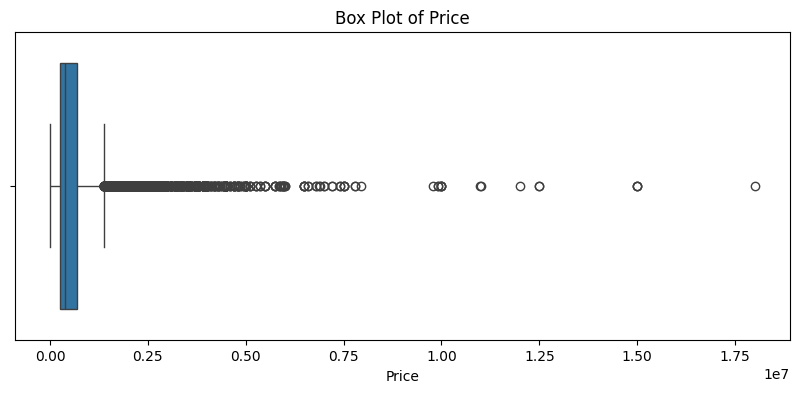

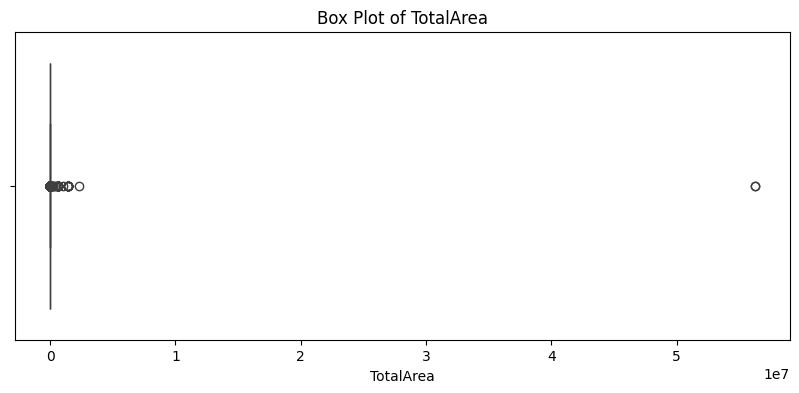

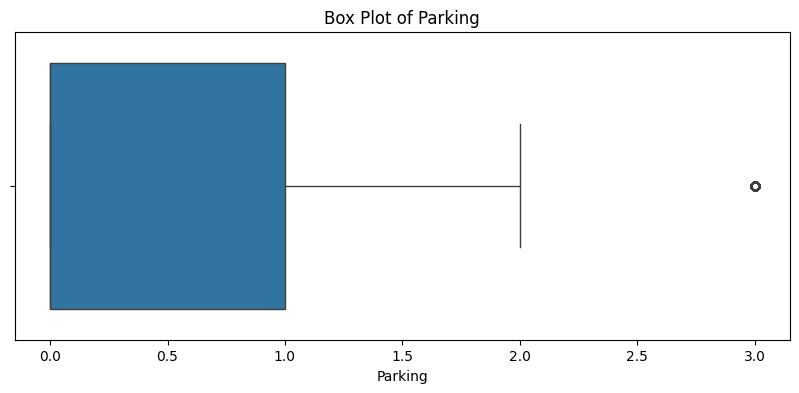

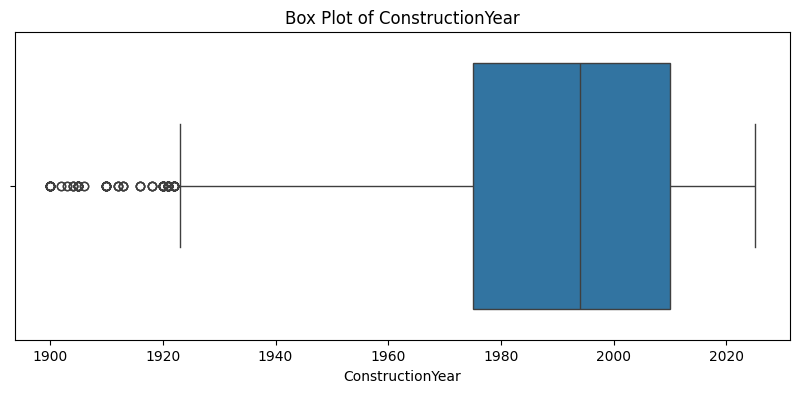

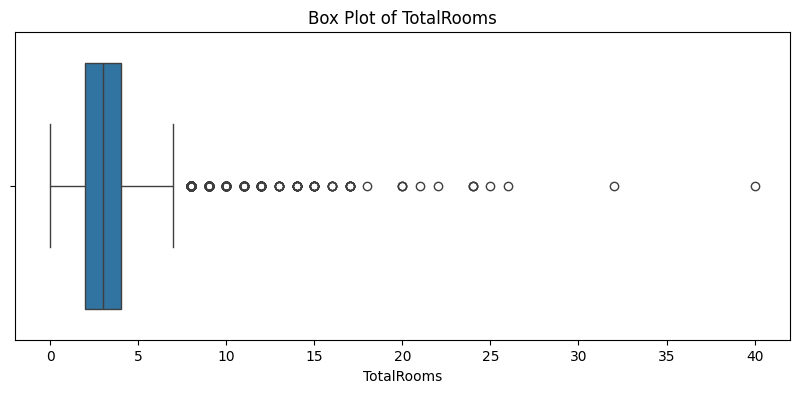

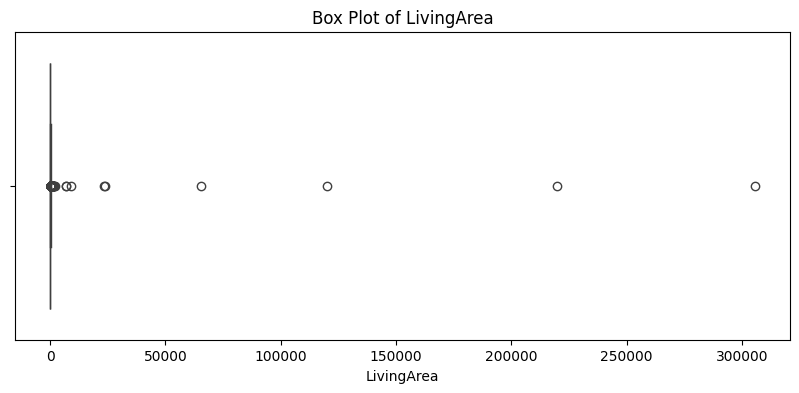

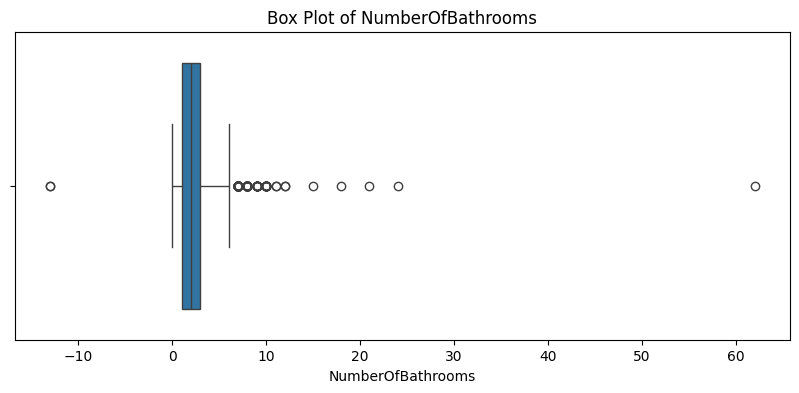

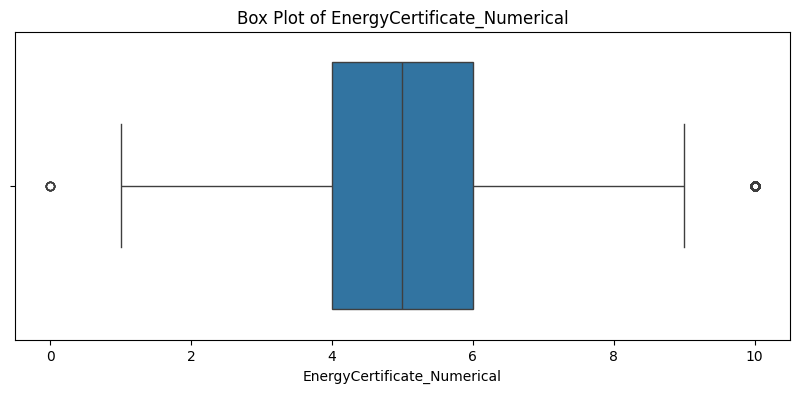

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = filtered_lisboa_df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=filtered_lisboa_df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

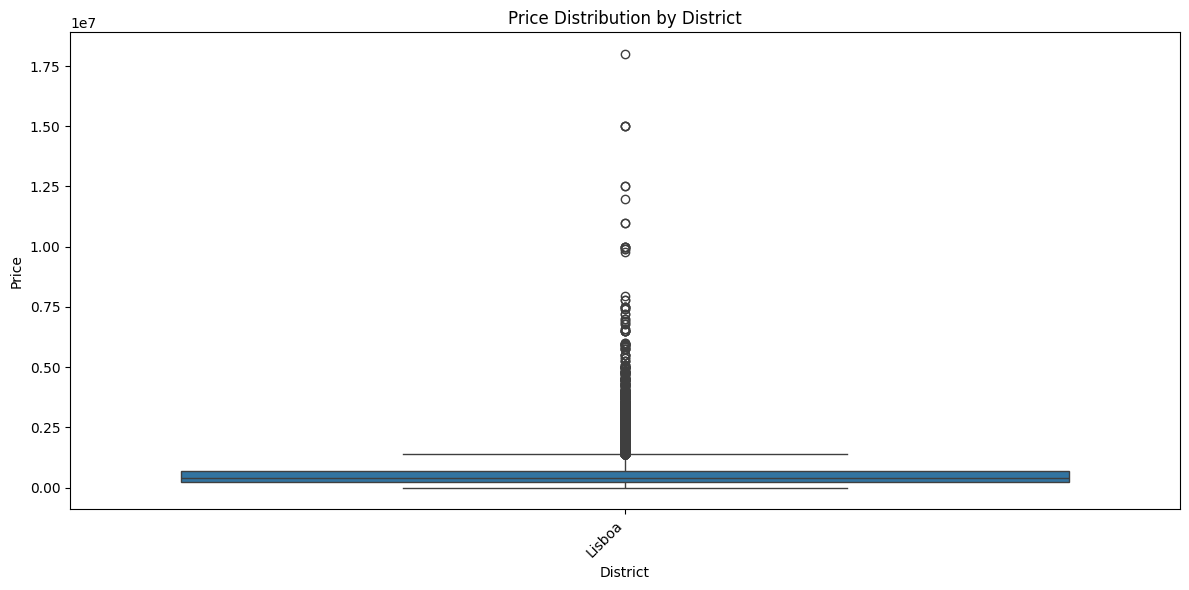

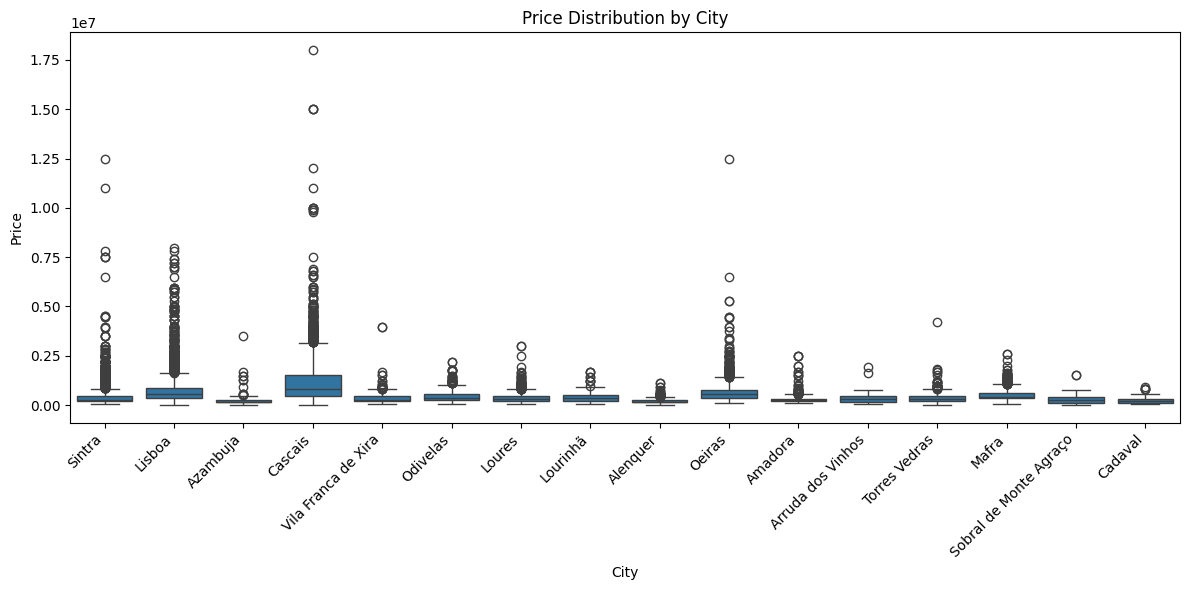

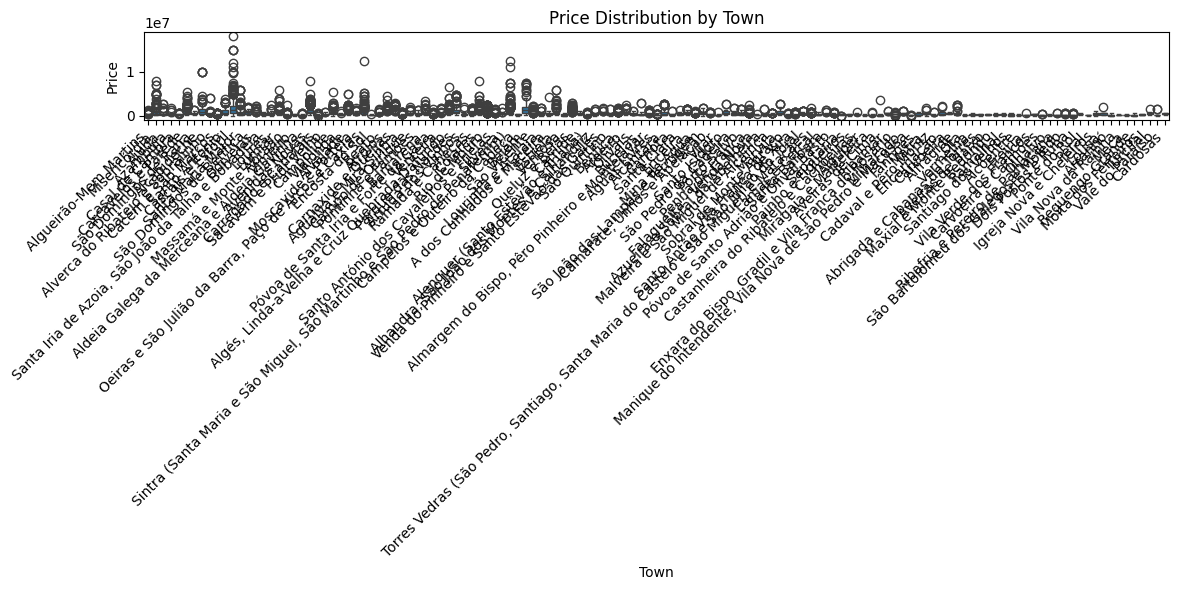

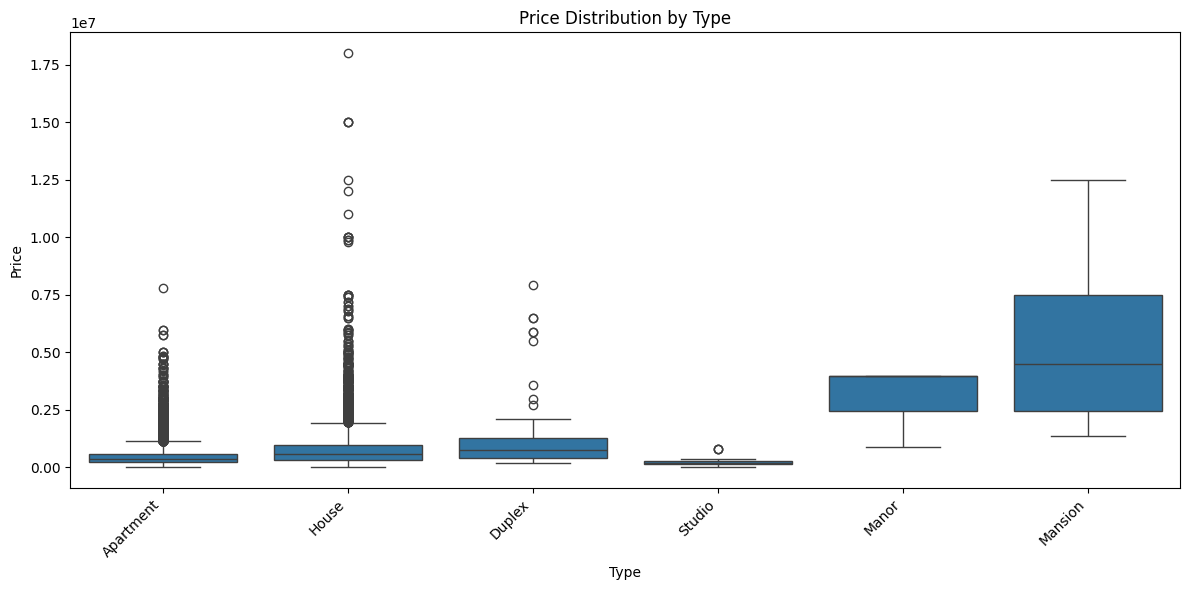

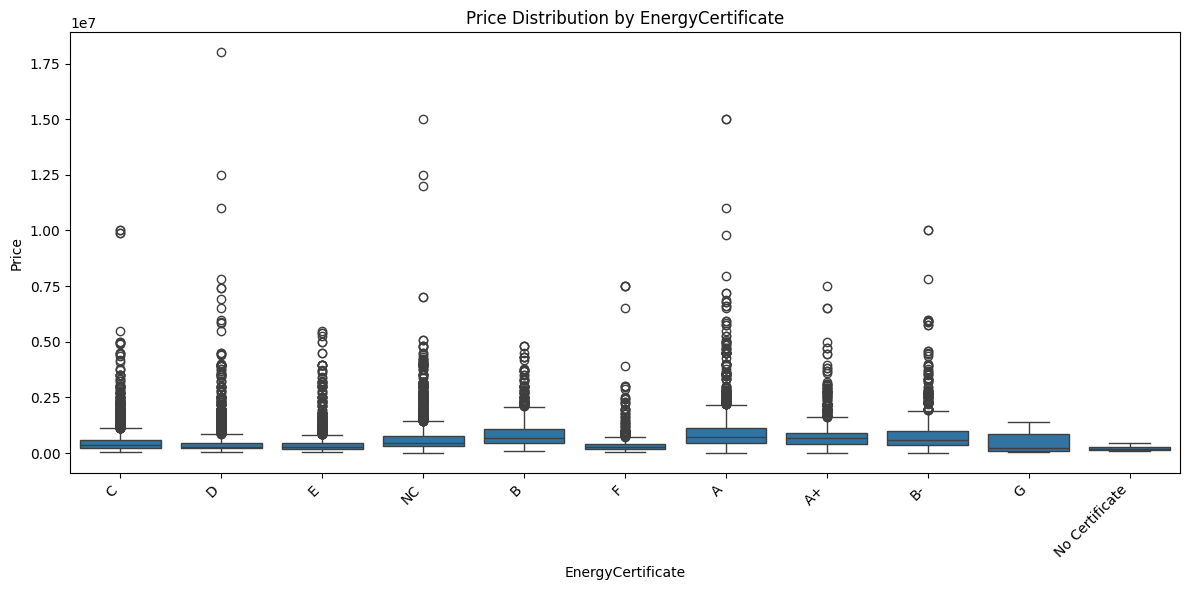

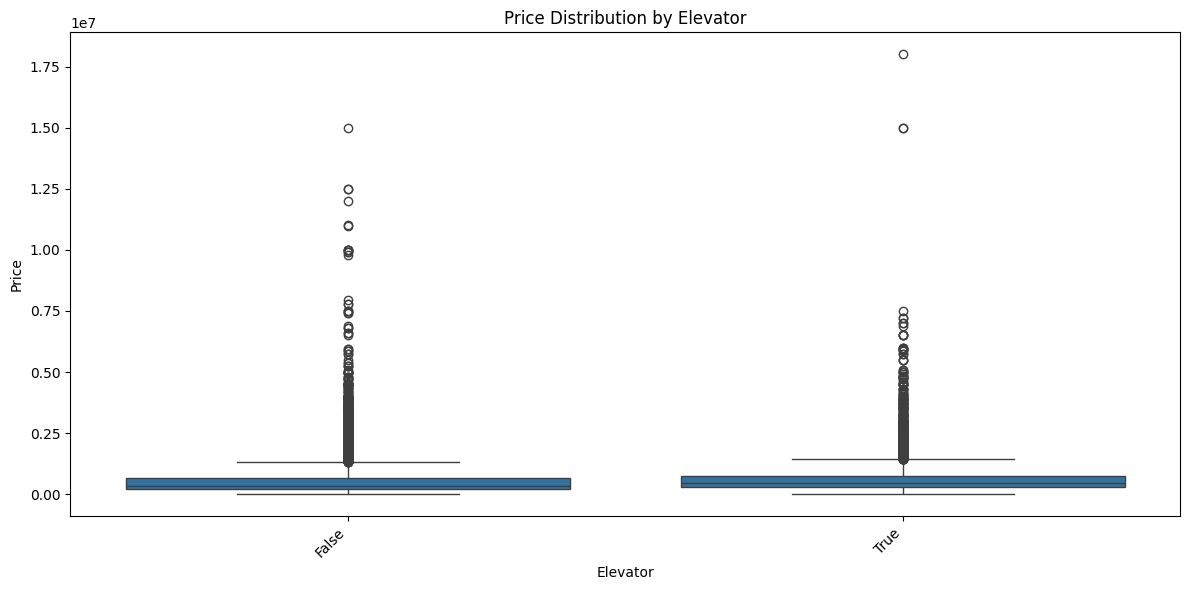

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = filtered_lisboa_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:  # Focus on City and Type for price distribution
    if col in categorical_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=filtered_lisboa_df[col], y=filtered_lisboa_df['Price'])
        plt.title(f'Price Distribution by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

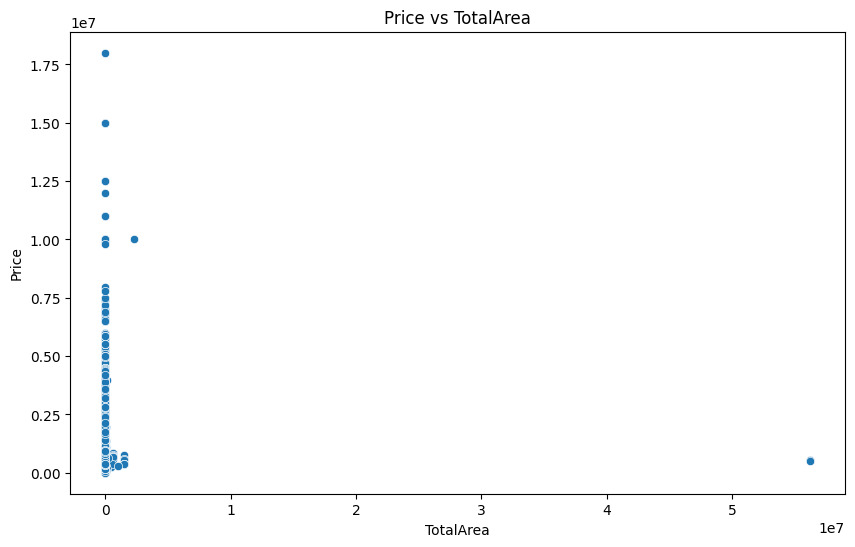

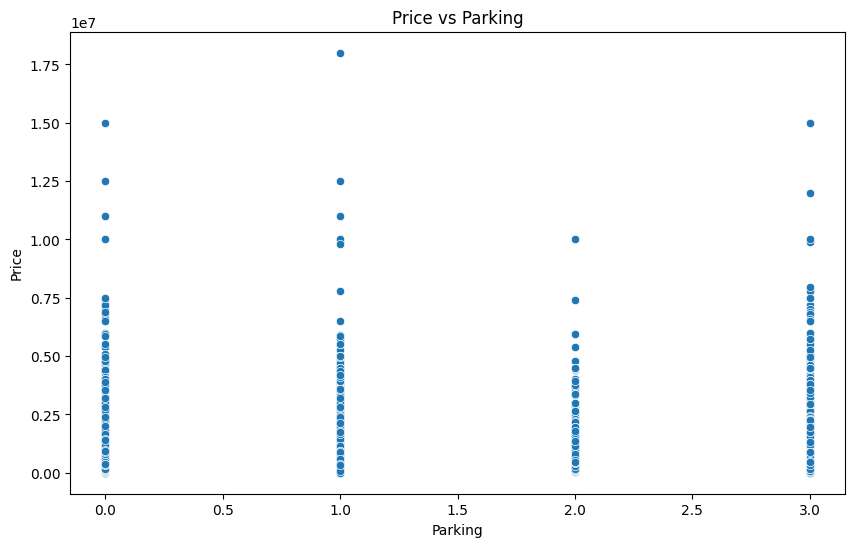

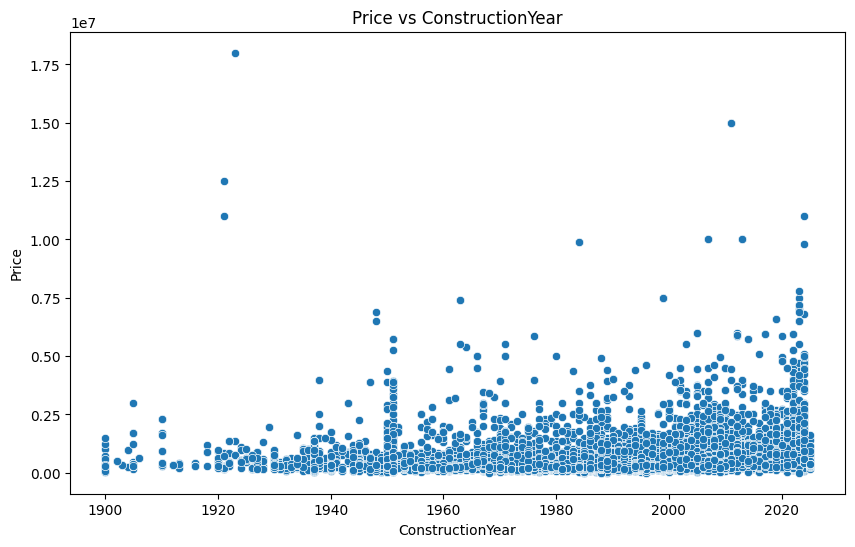

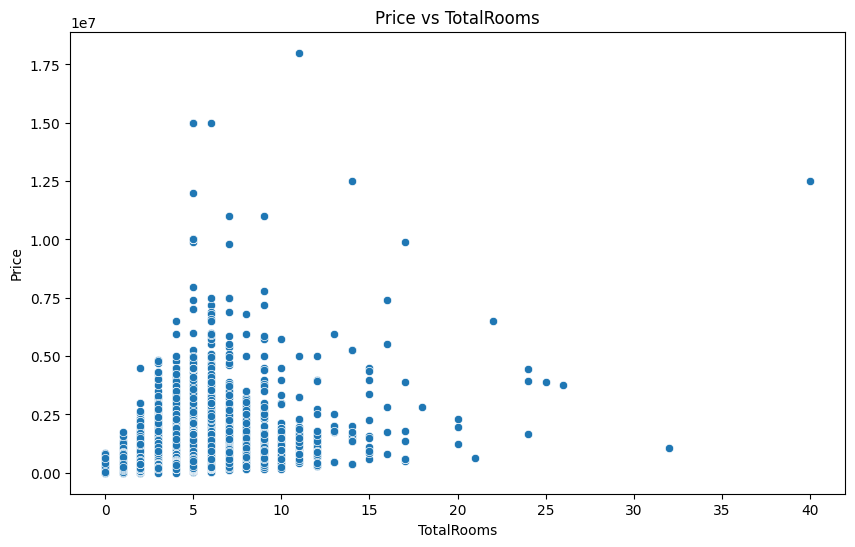

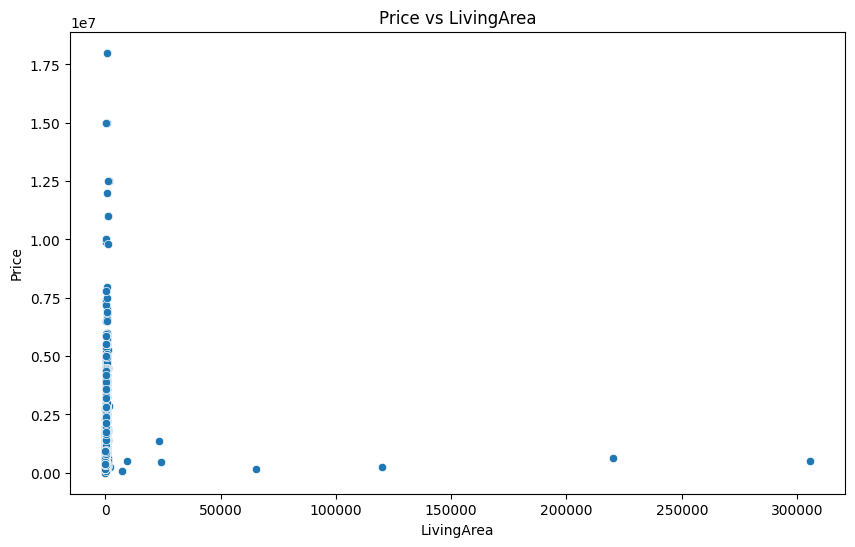

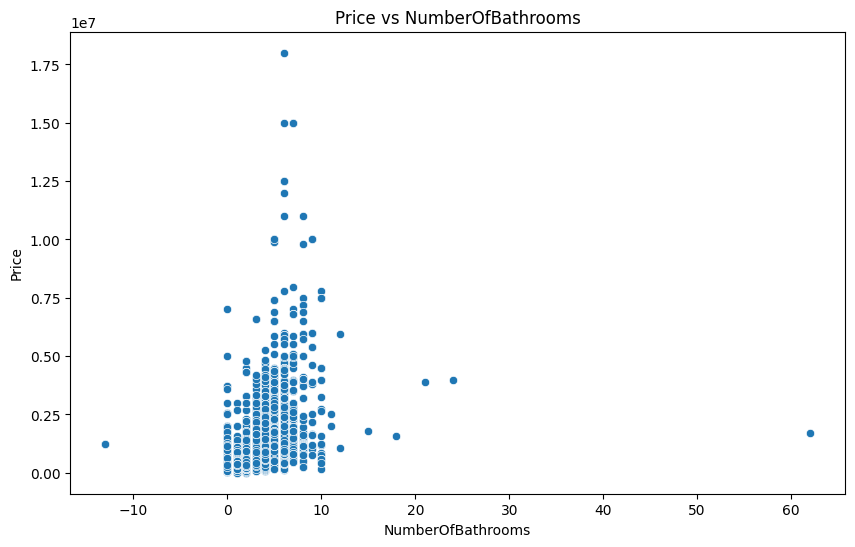

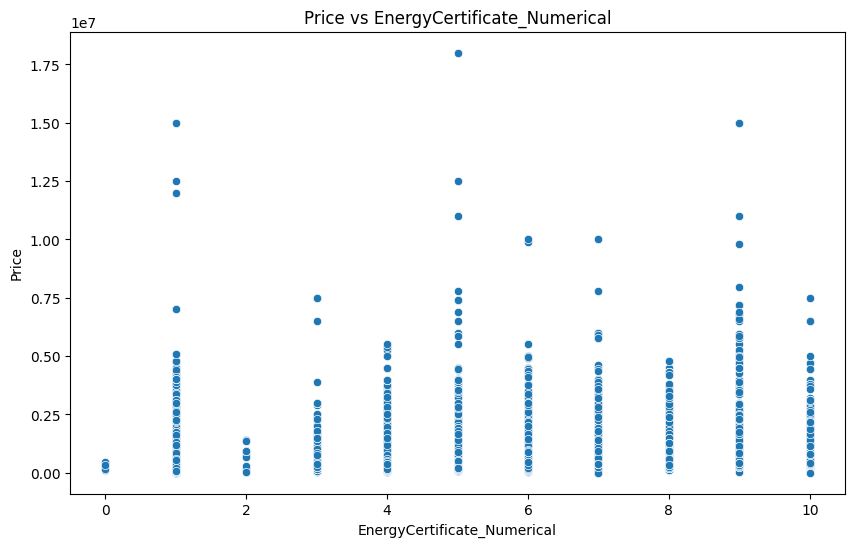

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = filtered_lisboa_df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    if col != 'Price':  # Exclude plotting Price against itself
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=filtered_lisboa_df[col], y=filtered_lisboa_df['Price'])
        plt.title(f'Price vs {col}')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()

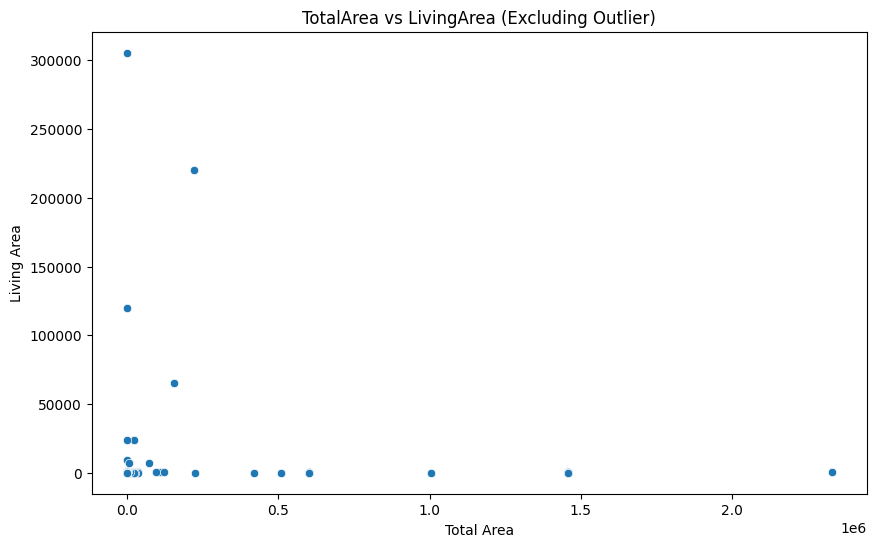

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the outlier in TotalArea
filtered_df_no_outlier = filtered_lisboa_df[filtered_lisboa_df['TotalArea'] != 56215100].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df_no_outlier['TotalArea'], y=filtered_df_no_outlier['LivingArea'])
plt.title('TotalArea vs LivingArea (Excluding Outlier)')
plt.xlabel('Total Area')
plt.ylabel('Living Area')
plt.show()

#Data drop

In [15]:
#Drop outlier of Living Area
filtered_lisboa_df = filtered_lisboa_df[(filtered_lisboa_df['LivingArea'] > 0) & (filtered_lisboa_df['LivingArea'] <= 2000)].copy()

In [16]:
# Drop rows with any NaN values in numerical columns
numerical_cols = filtered_lisboa_df.select_dtypes(include=['number']).columns
filtered_lisboa_df.dropna(subset=numerical_cols, inplace=True)

print("DataFrame after dropping rows with NaN in numerical columns:")
display(filtered_lisboa_df.head())
print("\nInformation about the DataFrame after dropping rows with NaN:")
filtered_lisboa_df.info()

DataFrame after dropping rows with NaN in numerical columns:


,Price,District,City,Town,Type,EnergyCertificate,TotalArea,Parking,ConstructionYear,Elevator,TotalRooms,LivingArea,NumberOfBathrooms,EnergyCertificate_Numerical
757,200000.0,Lisboa,Sintra,Algueirão-Mem Martins,Apartment,C,79.0,1.0,2000.0,True,2.0,79.0,1.0,6
1619,595000.0,Lisboa,Lisboa,Misericórdia,Apartment,D,110.0,0.0,1937.0,False,4.0,82.0,2.0,5
1640,315000.0,Lisboa,Lisboa,Ajuda,Apartment,D,68.0,0.0,1963.0,True,2.0,54.0,1.0,5
1682,100000.0,Lisboa,Azambuja,Azambuja,Apartment,D,208.0,0.0,1978.0,False,2.0,78.0,1.0,5
2124,300000.0,Lisboa,Lisboa,Ajuda,Apartment,C,0.0,0.0,1967.0,True,2.0,53.0,1.0,6



Information about the DataFrame after dropping rows with NaN:
<class 'pandas.core.frame.DataFrame'>
Index: 16010 entries, 757 to 135485
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        16010 non-null  float64
 1   District                     16010 non-null  object 
 2   City                         16010 non-null  object 
 3   Town                         16010 non-null  object 
 4   Type                         16010 non-null  object 
 5   EnergyCertificate            16010 non-null  object 
 6   TotalArea                    16010 non-null  float64
 7   Parking                      16010 non-null  float64
 8   ConstructionYear             16010 non-null  float64
 9   Elevator                     16010 non-null  object 
 10  TotalRooms                   16010 non-null  float64
 11  LivingArea                   16010 non-null  float64
 12  NumberOfBathr

#Split training and test data

In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = filtered_lisboa_df.drop(['Price','District','City'], axis=1)
y = filtered_lisboa_df['Price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12808, 11)
Shape of X_test: (3202, 11)
Shape of y_train: (12808,)
Shape of y_test: (3202,)


#Pipeline

In [18]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'filtered_lisboa_df' is your DataFrame after cleaning and before splitting
# Combine train and test for defining columns to avoid issues with unseen categories in test set
combined_df = pd.concat([X_train, X_test], axis=0)

# Define features to be used in the model (all columns except the target 'Price')
selected_features = X_train.columns.tolist()

numerical_features = combined_df[selected_features].select_dtypes(include=[np.number]).columns.tolist()
categorical_features = combined_df[selected_features].select_dtypes(include=['object']).columns.tolist()

numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [19]:
# Preprocess training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply log transformation to the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print("Shape of preprocessed training data:", X_train_processed.shape)
print("Shape of preprocessed test data:", X_test_processed.shape)
print("Shape of log-transformed training target:", y_train_log.shape)
print("Shape of log-transformed test target:", y_test_log.shape)

Shape of preprocessed training data: (12808, 157)
Shape of preprocessed test data: (3202, 157)
Shape of log-transformed training target: (12808,)
Shape of log-transformed test target: (3202,)


#Model selection with CV

Best Lasso params: {'alpha': 0.0005, 'max_iter': 10000}
Best Lasso score (RMSE): 0.4277320566427132


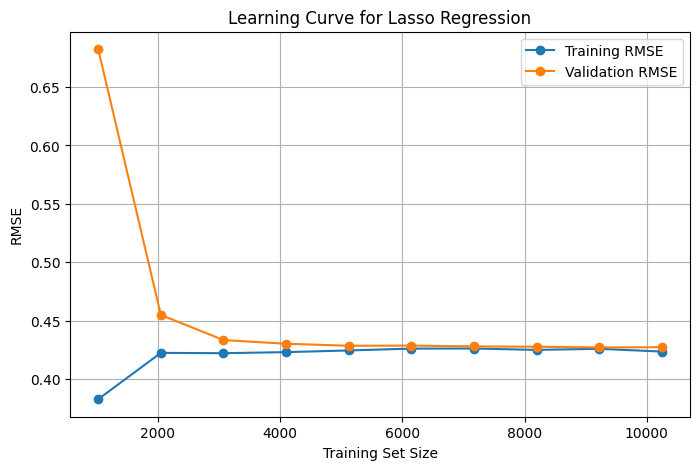

In [22]:
#Lasso

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Lasso
lasso_param_grid = {
    'alpha': [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'max_iter': [10000]
}
lasso = Lasso(random_state=42)
lasso_cv = GridSearchCV(
    estimator=lasso,
    param_grid=lasso_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
lasso_cv.fit(X_train_processed, y_train_log)
print("Best Lasso params:", lasso_cv.best_params_)
print("Best Lasso score (RMSE):", np.sqrt(-lasso_cv.best_score_))

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    Lasso(**lasso_cv.best_params_, random_state=42),
    X_train_processed,
    y_train_log,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_rmse = np.sqrt(-train_scores)
val_rmse = np.sqrt(-val_scores)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', label='Training RMSE')
plt.plot(train_sizes, val_rmse.mean(axis=1), 'o-', label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve for Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

Best RF params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RF score (RMSE): 0.3163960610534748


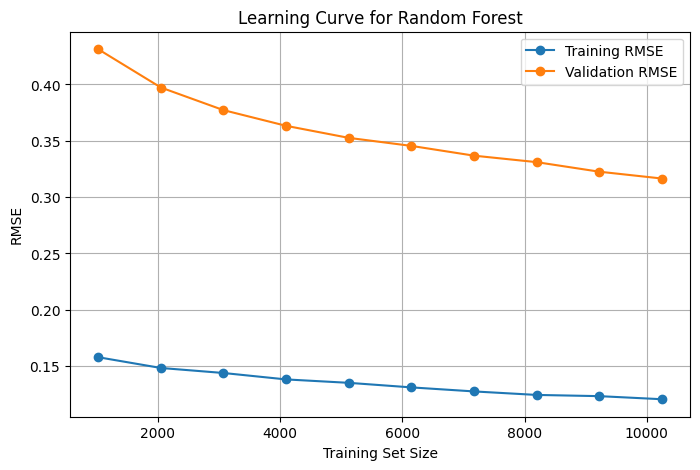

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)
rf_cv = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rf_cv.fit(X_train_processed, y_train_log)
print("Best RF params:", rf_cv.best_params_)
print("Best RF score (RMSE):", np.sqrt(-rf_cv.best_score_))

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestRegressor(**rf_cv.best_params_, random_state=42),
    X_train_processed,
    y_train_log,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_rmse = np.sqrt(-train_scores)
val_rmse = np.sqrt(-val_scores)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', label='Training RMSE')
plt.plot(train_sizes, val_rmse.mean(axis=1), 'o-', label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best XGB params: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.8}
Best XGBoost score (RMSE): 0.2661040999823245


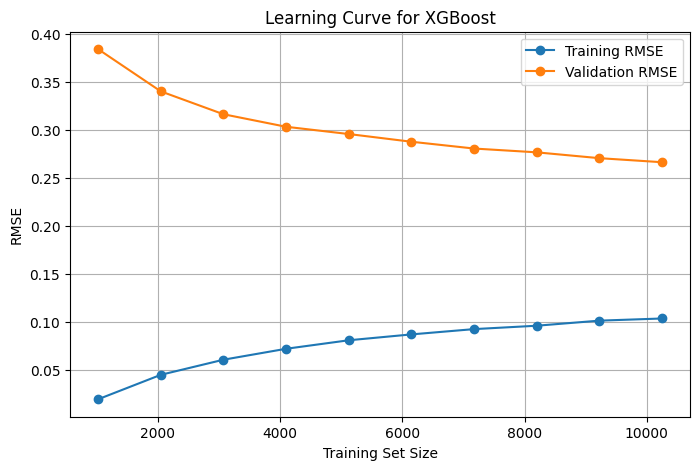

In [22]:
# XGBoost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

xgb_param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_cv = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)
xgb_cv.fit(X_train_processed, y_train_log)
print("Best XGB params:", xgb_cv.best_params_)
print("Best XGBoost score (RMSE):", np.sqrt(-xgb_cv.best_score_))

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    XGBRegressor(**xgb_cv.best_params_, objective='reg:squarederror', random_state=42),
    X_train_processed,
    y_train_log,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_rmse = np.sqrt(-train_scores)
val_rmse = np.sqrt(-val_scores)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', label='Training RMSE')
plt.plot(train_sizes, val_rmse.mean(axis=1), 'o-', label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve for XGBoost')
plt.legend()
plt.grid(True)
plt.show()

#Stacking

In [20]:
rf_best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
lasso_best_params = {'alpha': 0.0005, 'max_iter': 10000}
xgb_best_params = {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.8}

Stacking Ensemble CV RMSE: [0.25925496 0.25192379 0.26247219 0.27668855 0.27542768]
Mean RMSE: 0.26515343333379765


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


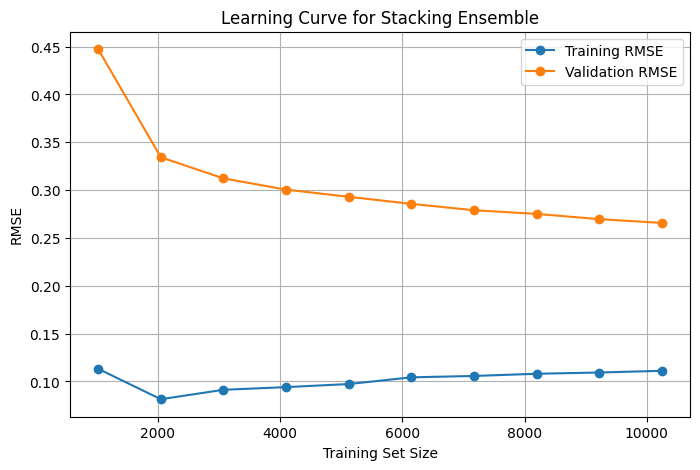

In [22]:
# 7. Stacking ensemble
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

xgb_best = XGBRegressor(**xgb_best_params, random_state=42)
ensemble = StackingRegressor(
    estimators=[
        ('lasso', Lasso(**lasso_best_params, random_state=42)),
        ('rf', RandomForestRegressor(**rf_best_params, random_state=42)),
        ('xgb', xgb_best)
    ],
    final_estimator=Lasso(alpha=0.001, random_state=42, max_iter=10000),
    n_jobs=-1
)
ensemble.fit(X_train_processed, y_train_log)

cv_scores = cross_val_score(ensemble, X_train_processed, y_train_log, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print("Stacking Ensemble CV RMSE:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

train_sizes, train_scores, val_scores = learning_curve(
    ensemble,
    X_train_processed,
    y_train_log,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_rmse = np.sqrt(-train_scores)
val_rmse = np.sqrt(-val_scores)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', label='Training RMSE')
plt.plot(train_sizes, val_rmse.mean(axis=1), 'o-', label='Validation RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve for Stacking Ensemble')
plt.legend()
plt.grid(True)
plt.show()

#Test

In [23]:
# 8. Apply models to test set
from sklearn.metrics import mean_squared_error, r2_score

ensemble_pred_log = ensemble.predict(X_test_processed)
ensemble_pred = np.expm1(ensemble_pred_log)
print("Stacking ensemble predictions (first 10):", ensemble_pred[:10])

# Evaluate the stacking ensemble model
ensemble_rmse = np.sqrt(mean_squared_error(y_test_log, ensemble_pred_log))
ensemble_r2 = r2_score(y_test_log, ensemble_pred_log)

print("\nStacking Ensemble Performance on Test Set:")
print(f"RMSE: {ensemble_rmse:.4f}")
print(f"R-squared: {ensemble_r2:.4f}")

Stacking ensemble predictions (first 10): [332863.04930112 528890.45235095 433092.31693593 213188.32120808
 636997.41317311 823428.98713488 551530.8069819  124729.80067278
 364235.27772839 374121.02623077]

Stacking Ensemble Performance on Test Set:
RMSE: 0.2467
R-squared: 0.9121


In [28]:
# Showcase predictions with original test file and reference
# Create a DataFrame to compare actual vs predicted prices
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': ensemble_pred
})
results_df['Error'] = results_df['Actual Price'] - results_df['Predicted Price']
results_df['Absolute Error'] = abs(results_df['Error'])
results_df['Percentage Error'] = (results_df['Absolute Error'] / results_df['Actual Price']) * 100

print("DataFrame with Actual vs Predicted Prices vs Error:")
display(results_df.head(100))

DataFrame with Actual vs Predicted Prices vs Error:


,Actual Price,Predicted Price,Error,Absolute Error,Percentage Error
116574,377000.0,332863.049301,44136.950699,44136.950699,11.707414
93008,420000.0,528890.452351,-108890.452351,108890.452351,25.926298
6109,385000.0,433092.316936,-48092.316936,48092.316936,12.491511
6141,190000.0,213188.321208,-23188.321208,23188.321208,12.204380
92359,499000.0,636997.413173,-137997.413173,137997.413173,27.654792
...,...,...,...,...,...
133541,999999.0,869912.314193,130086.685807,130086.685807,13.008682
8310,57000.0,84492.075915,-27492.075915,27492.075915,48.231712
118791,325000.0,287834.220056,37165.779944,37165.779944,11.435625
89091,185000.0,205636.024945,-20636.024945,20636.024945,11.154608
